<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Linear</a></span><ul class="toc-item"><li><span><a href="#Simulando-dados" data-toc-modified-id="Simulando-dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulando dados</a></span><ul class="toc-item"><li><span><a href="#Construindo-modelo" data-toc-modified-id="Construindo-modelo-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Construindo modelo</a></span><ul class="toc-item"><li><span><a href="#Com-statsmodels" data-toc-modified-id="Com-statsmodels-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Com statsmodels</a></span></li><li><span><a href="#Com-SKLEARN" data-toc-modified-id="Com-SKLEARN-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Com SKLEARN</a></span></li></ul></li><li><span><a href="#Fazendo-previsões-com-SKLEARN" data-toc-modified-id="Fazendo-previsões-com-SKLEARN-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Fazendo previsões com SKLEARN</a></span></li></ul></li><li><span><a href="#Com-dados-reais" data-toc-modified-id="Com-dados-reais-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Com dados reais</a></span><ul class="toc-item"><li><span><a href="#Utilizando-StatsModels" data-toc-modified-id="Utilizando-StatsModels-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Utilizando StatsModels</a></span></li><li><span><a href="#Utilizando-SKLEARN" data-toc-modified-id="Utilizando-SKLEARN-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Utilizando SKLEARN</a></span></li><li><span><a href="#Avaliando-Erro" data-toc-modified-id="Avaliando-Erro-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Avaliando Erro</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Regressão Linear

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Simulando dados

In [3]:
def simular_dado(media_X, desvpad_X, 
                 desvpad_E, A, B, 
                 samples):
    
    x = np.random.normal(loc = media_X, scale = desvpad_X, size = samples)
    
    E = np.random.normal(loc = 0, scale = desvpad_E, size = samples)
    
    y = B + A * x + E
    return pd.DataFrame({'x' : x, 'y' : y})

In [4]:
teste = simular_dado(media_X = 0, desvpad_X = 1, 
                     desvpad_E = 5, A = 10, B = 50, 
                     samples = 100)

In [ ]:
# y = 50 + 10 * x
# E = Normal(0, 5)
# n = 100

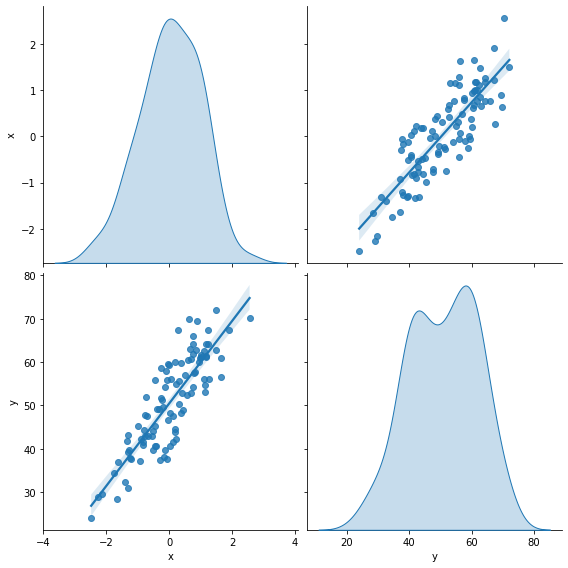

In [5]:
sns.pairplot(data = teste, diag_kind = 'kde', kind = 'reg',
            height = 4)

### Construindo modelo

#### Com statsmodels

In [36]:
teste = simular_dado(media_X = 0, desvpad_X = 1, 
                     desvpad_E = 6, A = 10, B = 5, 
                     samples = 100)

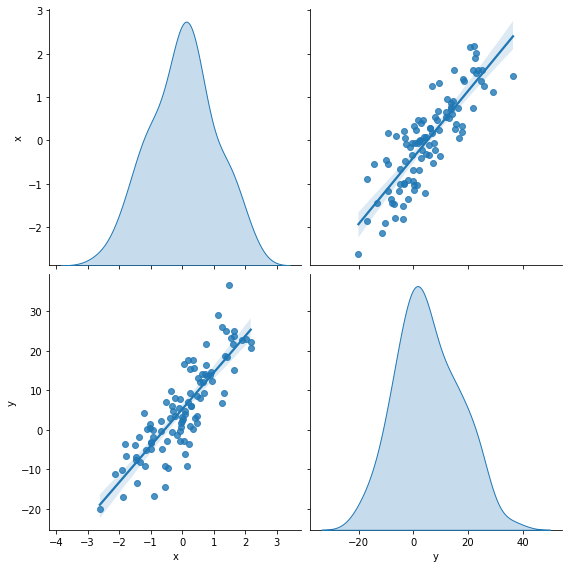

In [37]:
sns.pairplot(data = teste, diag_kind = 'kde', kind = 'reg',
            height = 4)

In [38]:
X = sm.add_constant(teste['x'])

In [39]:
y = teste['y']

In [40]:
modelo = sm.OLS(y, X)

In [41]:
lm_fit = modelo.fit()

In [42]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     239.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           4.32e-28
Time:                        20:31:10   Log-Likelihood:                -322.95
No. Observations:                 100   AIC:                             649.9
Df Residuals:                      98   BIC:                             655.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2017      0.618      8.422      0.000       3.976       6.427
x              9.2692      0.598     15.490      0.000       8.082      10.457
==============================================================================
Omnibus:                        0.973   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.511
Skew:                          -0.108   Prob(JB):                        0.774
Kurtosis:                       3.275   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def estimar_lm(data):
    X = sm.add_constant(data['x'])
    y = data['y']
    modelo = sm.OLS(y, X)
    lm_fit = modelo.fit()
    return lm_fit

In [ ]:
teste_1 = simular_dado(media_X=0,
                       desvpad_X=1,
                       desvpad_E=10,
                       A=1,
                       B=0,
                       samples=100)

teste1_fit = estimar_lm(teste_1)
sns.pairplot(data = teste_1, diag_kind = 'kde', kind = 'reg',
            height = 4)
teste1_fit.summary()

#### Com SKLEARN

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
modelo = LinearRegression()

In [49]:
X = teste[['x']]
y = teste['y']

In [50]:
modelo.fit(X, y)

LinearRegression()

In [51]:
print(modelo.coef_[0])
print(modelo.intercept_)

9.269212599406192
5.201683961065419


### Fazendo previsões com SKLEARN

In [52]:
modelo.predict(X)

array([  5.98748169,   8.31545899,   2.16850438,   2.18681969,
         4.59658794,   0.14440211,  -5.97867276,  13.65671023,
        17.51375656,  10.31700745, -12.51682542,  25.25334826,
        12.24195768,  -5.28746497, -12.09464851, -11.36425418,
         5.81694373,  -4.29869111,  18.34012346,   4.26429738,
        10.95272691, -14.67631694,  11.85082464, -19.00914981,
        20.30799438,  11.19868282,   1.80592994,   3.19521728,
       -11.5471626 ,   2.33793116,   5.29474003,  19.62876188,
         9.59174052,   6.06758052,   7.2789763 ,  -3.30063439,
        13.22231704,  -8.21159391,  -3.45796309,   5.00963804,
         3.17091091,  12.0583244 ,  -1.12058261,  15.61440674,
        13.98992305,  -8.24766908,  -0.84961345,   3.73576872,
        25.31630087,  20.25153209,  23.86511549,   7.54513105,
         6.73508991,  -8.76884623,   5.73190465,   8.66789815,
        16.79151964,   7.51963123,  -4.34532078,   6.85930222,
         0.16852853,   8.33058358,   9.47901434,  17.92

In [53]:
teste['pred'] = modelo.predict(X)

In [54]:
teste

,x,y,pred
0,0.084775,4.000246,5.987482
1,0.335927,0.207310,8.315459
2,-0.327232,-0.488627,2.168504
3,-0.325256,5.925938,2.186820
4,-0.065280,7.767605,4.596588
...,...,...,...
95,-0.454355,-9.798815,0.990174
96,0.197164,17.718191,7.029239
97,0.396043,3.018640,8.872690
98,0.674607,9.197799,11.454761


<AxesSubplot:xlabel='x', ylabel='y'>

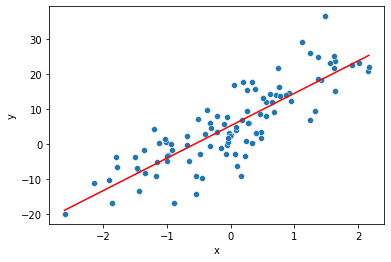

In [55]:
sns.scatterplot(data=teste, x = 'x', y = 'y')
sns.lineplot(data=teste, x = 'x', y = 'pred', color = 'red')

<AxesSubplot:xlabel='erro', ylabel='Count'>

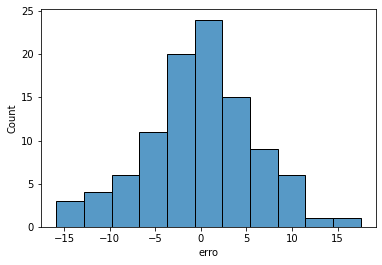

In [56]:
teste['erro'] = teste['y'] - teste['pred']
sns.histplot(data = teste, x = 'erro')

In [60]:
np.sqrt((teste['erro'] ** 2).mean())

6.11358584717869

## Com dados reais

### Utilizando StatsModels

In [61]:
tb_olist = pd.read_csv('data/tb_diaria_olist.csv')
tb_olist.describe()

,num_pedidos,avg_review,std_review,per_detractor,per_atraso,avg_atraso,cv_review,mm_num_pedidos,mm_avg_review,mm_cv_review,mm_per_detractor,mm_per_atraso
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,155.606648,4.077337,1.320554,0.232236,0.063696,0.653575,0.327721,155.657948,4.073465,0.328720,0.233343,0.064258
std,77.529889,0.247652,0.190119,0.072723,0.062367,0.774158,0.065786,47.488911,0.200077,0.051103,0.057404,0.057108
min,3.000000,3.322176,0.000000,0.000000,0.000000,0.000000,0.000000,89.857143,3.455875,0.237149,0.132707,0.002707
25%,109.000000,3.940909,1.212832,0.182266,0.021978,0.168317,0.285608,111.714286,3.989496,0.294851,0.194416,0.028508
50%,142.000000,4.116279,1.315797,0.219388,0.043478,0.395210,0.318805,159.857143,4.103207,0.321113,0.222986,0.042033
75%,187.000000,4.248945,1.439813,0.273196,0.082397,0.876812,0.365143,182.928571,4.211584,0.350699,0.257911,0.076023
max,789.000000,5.000000,1.746777,0.447699,0.313808,6.250000,0.525793,358.857143,4.408870,0.482608,0.401864,0.271882


<AxesSubplot:xlabel='per_atraso', ylabel='avg_review'>

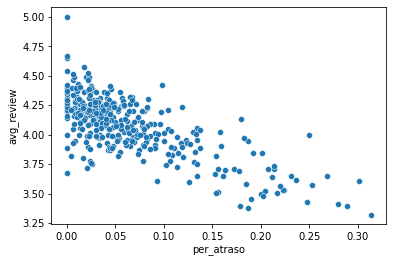

In [62]:
sns.scatterplot(data = tb_olist, x = 'per_atraso', y = 'avg_review')

In [63]:
X = sm.add_constant(tb_olist['per_atraso'] * 100)
y = tb_olist['avg_review']

In [64]:
modelo = sm.OLS(y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_review   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     421.3
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.74e-62
Time:                        20:54:52   Log-Likelihood:                 132.25
No. Observations:                 361   AIC:                            -260.5
Df Residuals:                     359   BIC:                            -252.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2632      0.013    336.640      0.000       4.238       4.288
per_atraso    -0.0292      0.001    -20.525      0.000      -0.032      -0.026
==============================================================================
Omnibus:                       10.869   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               21.005
Skew:                          -0.043   Prob(JB):                     2.75e-05
Kurtosis:                       4.179   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
4.26 + (-0.0292 * 20)

3.6759999999999997

### Utilizando SKLEARN

In [67]:
lm_fit = LinearRegression()
X = tb_olist[['per_atraso']]
y = tb_olist['avg_review']
lm_fit.fit(X, y)

LinearRegression()

In [68]:
lm_fit.coef_

array([-2.91771914])

In [71]:
lm_fit.predict([[1]])

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.34546438])

### Avaliando Erro

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
lm_fit = LinearRegression()
lm_fit.fit(X_train, y_train)

LinearRegression()

In [75]:
X_test['pred_avg_score'] = lm_fit.predict(X_test)
X_test['real_avg_score'] = y_test
X_test['erro2'] = (X_test['real_avg_score'] - X_test['pred_avg_score'])**2

In [78]:
X_test

,per_atraso,pred_avg_score,real_avg_score,erro2
350,0.021739,4.194517,4.467391,0.074460
288,0.062069,4.080487,4.068966,0.000133
341,0.083333,4.020363,4.305556,0.081335
35,0.012048,4.221917,4.210843,0.000123
153,0.042553,4.135667,4.000000,0.018405
...,...,...,...,...
196,0.092896,3.993325,3.606557,0.149589
110,0.098214,3.978289,4.419643,0.194794
173,0.000000,4.255983,5.000000,0.553561
72,0.044248,4.130875,4.044248,0.007504


In [79]:
RMSE = np.sqrt(X_test['erro2'].mean()) # Root Mean Square Error
print(RMSE)

0.18031360493936957


In [80]:
# VOLTAMOS 21H30